In [2]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# from numpy import nansum
# from numpy import nanmean
ph = pd.read_csv("/Users/liqunp/OneDrive/Home/Desk/Battery_paper_July/Plot_data/Hetergenous_low.csv")

ph_plot = ph.groupby([
    pd.Grouper('Scenarios'),
    pd.Grouper('Pro'),
]).sum()


In [3]:
scens = ['Low_RE','Low_Grid','Low_Demand']
provs = ['Anhui', 'Beijing', 'Chongqing', 'Eastern_IM', 'Fujian','Gansu', 'Guangdong', 
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei','Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi',
       'Jilin', 'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong','Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Western_IM','Xinjiang', 'Yunnan', 'Zhejiang']
# new df
filled_ratio = pd.DataFrame(
    index=pd.MultiIndex.from_product([scens, provs], names=('scenario', 'province'))
)
filled_ratio["Ratio"] = 0


for scen in scens:
    for prov in provs:
        if ph_plot.index.isin([(scen, prov)]).any():
            filled_ratio.loc[(scen, prov), "Ratio"] = ph_plot.loc[(scen, prov), "Ratios"]        
            


In [4]:
# filled_ratio.loc["Low_RE"].sort_values("Ratio", ascending=False)
df_ratios = filled_ratio.loc["Low_RE"]
for scen in scens:
    df_ratios[scen] = filled_ratio.loc[scen]
df_ratios.sort_values(by=["Low_RE", "Low_Demand"], ascending=[False, True], inplace=True)


,Ratio,Low_RE,Low_Grid,Low_Demand
province,,,,
Western_IM,0.62,0.62,0.35,0.03
Qinghai,0.53,0.53,0.47,0.00
Gansu,0.53,0.53,0.30,0.17
Jilin,0.52,0.52,0.00,0.48
Shanxi,0.41,0.41,0.16,0.43
Guangxi,0.39,0.39,0.00,0.61
Yunnan,0.22,0.22,0.73,0.05
Eastern_IM,0.21,0.21,0.63,0.16
Ningxia,0.00,0.00,0.93,0.07


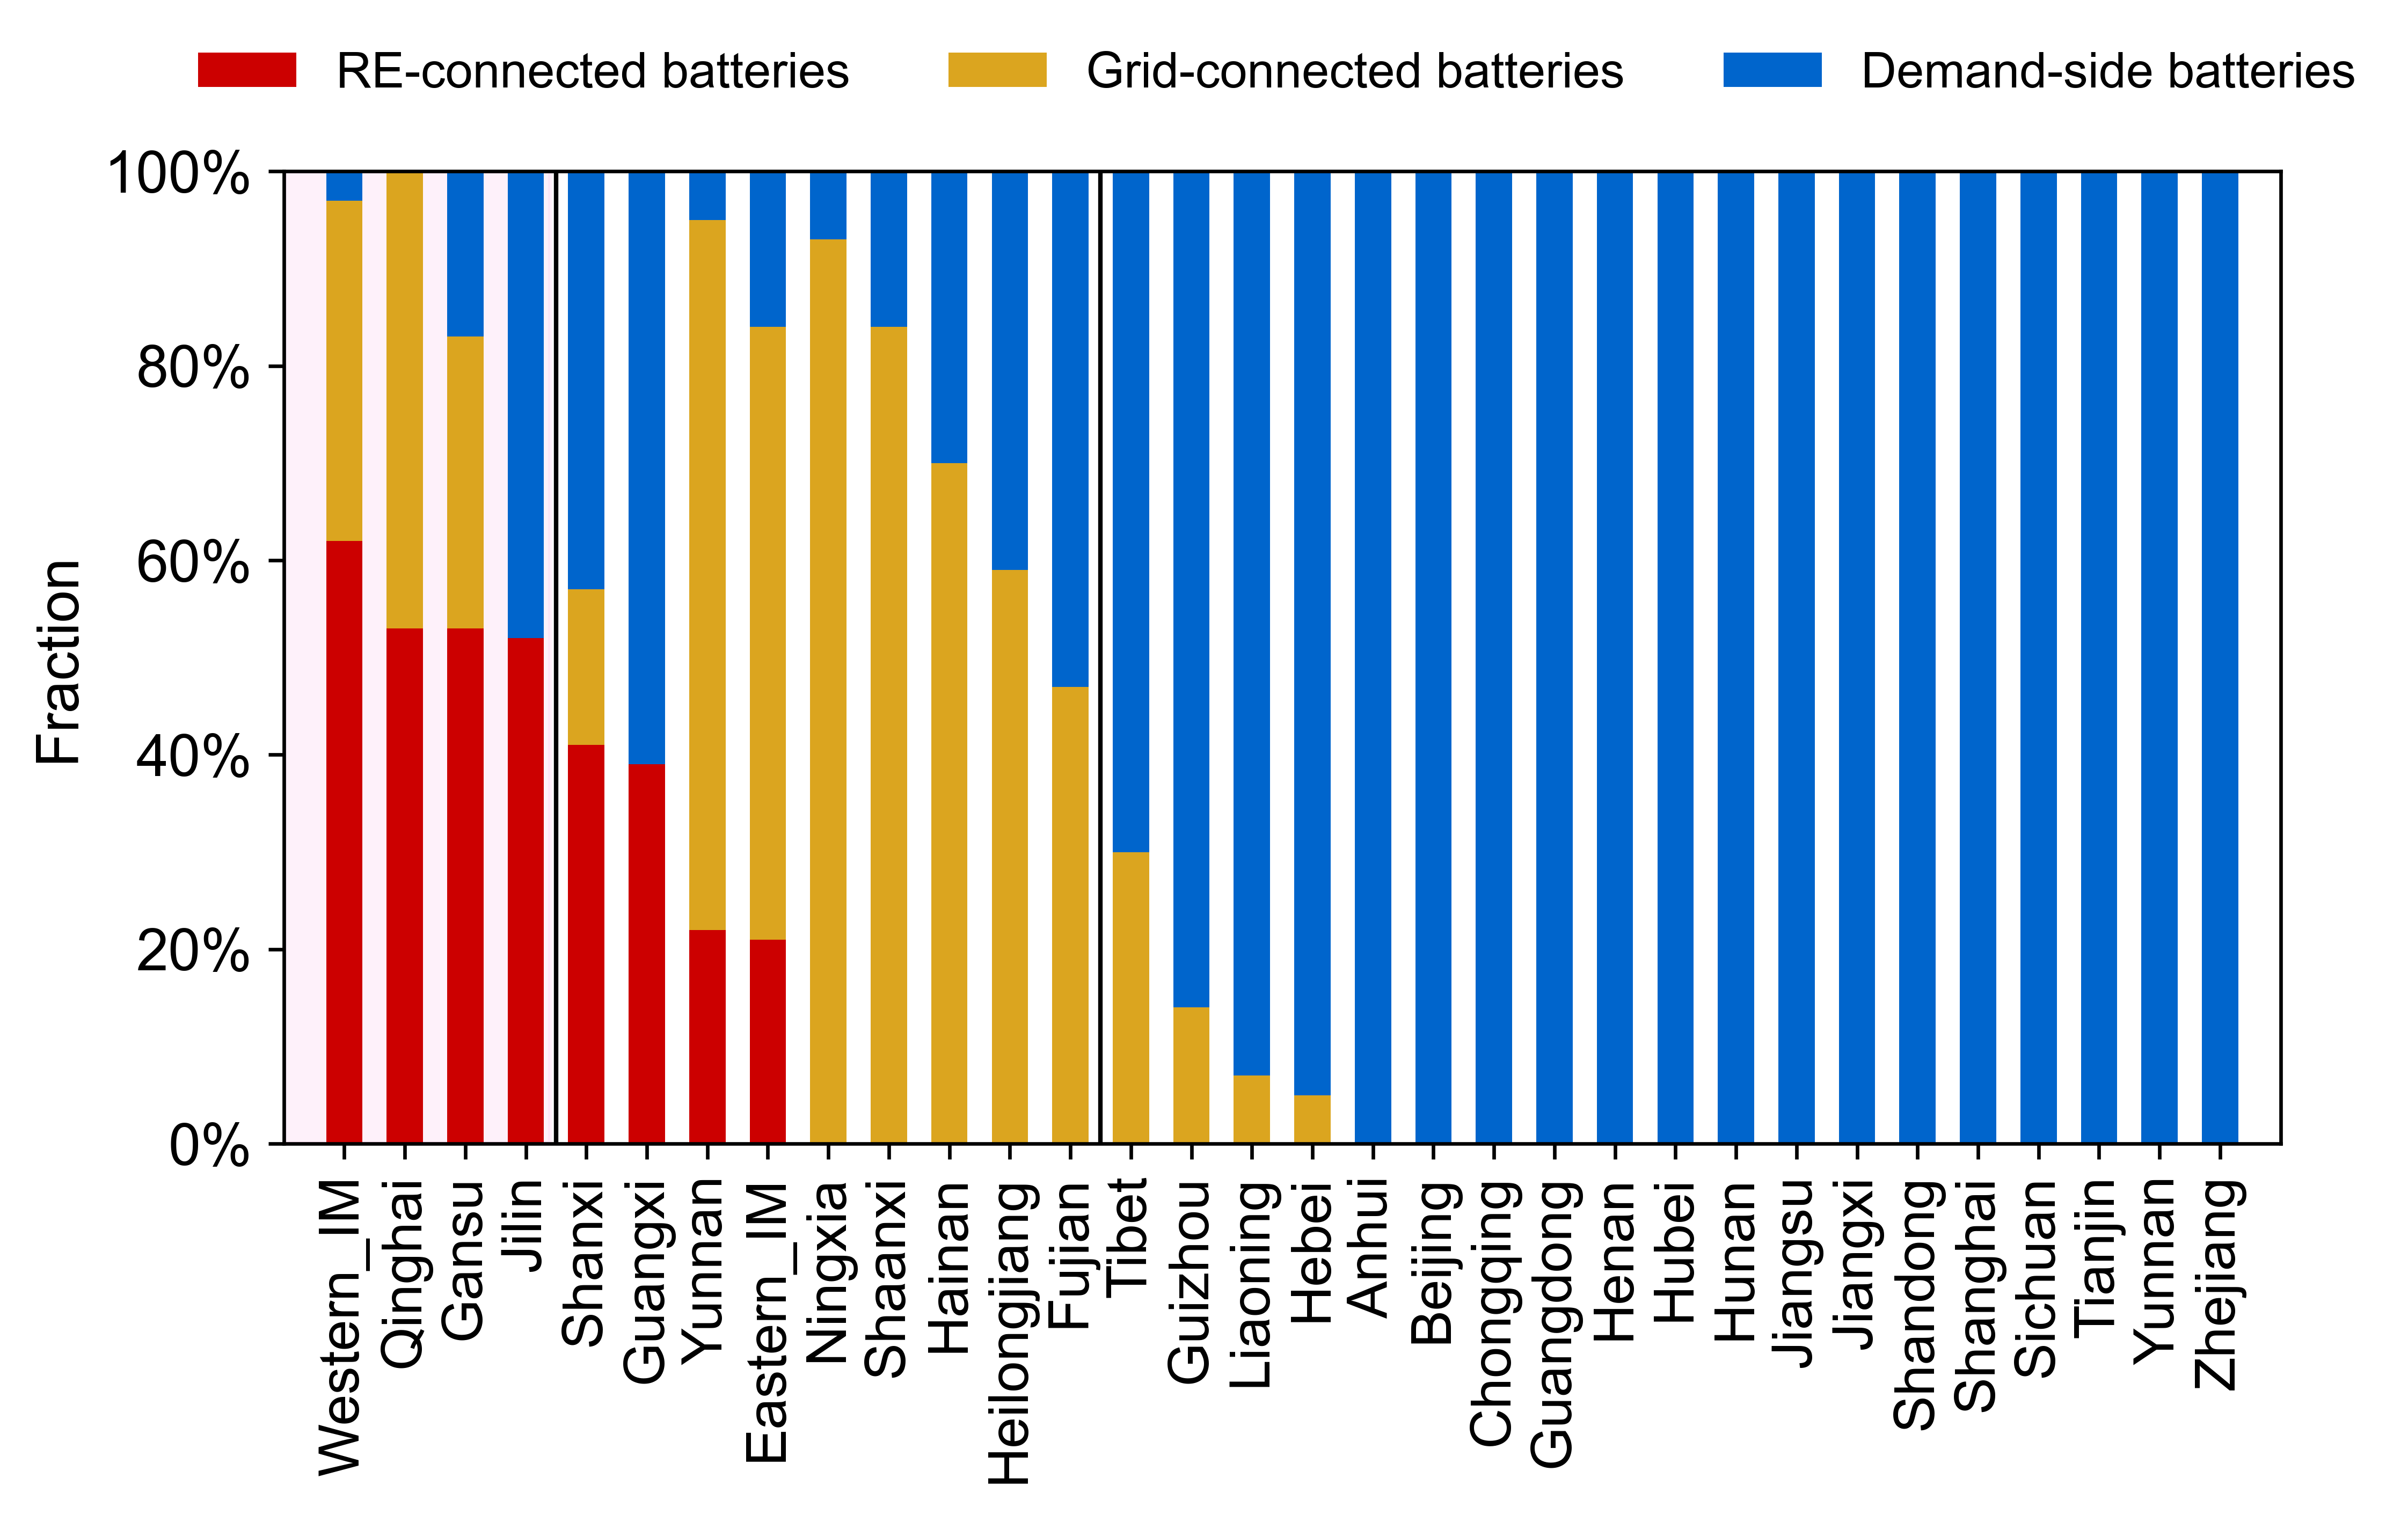

In [12]:
colors = ['#cc0000','#dba51f', '#0065cc']
labels = ['RE-connected batteries', 'Grid-connected batteries','Demand-side batteries']
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
provs_new = ['Western_IM','Qinghai', 'Gansu', 'Jilin', 'Shanxi', 'Guangxi','Yunnan', 'Eastern_IM', 
       'Ningxia', 'Shaanxi', 'Hainan','Heilongjiang', 'Fujian', 'Tibet', 'Guizhou', 'Liaoning', 'Hebei',
       'Anhui', 'Beijing', 'Chongqing', 'Guangdong', 'Henan', 'Hubei','Hunan',
       'Jiangsu', 'Jiangxi', 'Shandong', 'Shanghai', 'Sichuan','Tianjin', 'Yunnan', 'Zhejiang']

fig = plt.figure(figsize=(8, 4), dpi=600)

width = 0.6
bottom = len(r) * [0]
for idx in range(len(scens)):
    scen = scens[idx]
    plt.bar(r, df_ratios[scen].values, bottom = bottom, color = colors[idx], label=labels[idx],width=width)
    bottom = bottom + df_ratios[scen].values


plt.xticks(r, provs_new,fontname = 'Arial', size =12.5,rotation='vertical'  )
plt.yticks (fontname = 'Arial', size =13)
plt.ylabel('Fraction', size = 13, fontname = 'Arial')
plt.xlim(-1, 32)
plt.ylim(0, 1)

plt.legend(frameon=False, bbox_to_anchor=(1.06, 1.1),loc = 'right', ncol=3, prop={'size': 11,'family':'Arial'})

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
barWidth = 0.6


plt.fill_between([-1, 3.4], 0, 1, color='#fbbde7', alpha=0.2, )
# plt.fill_between([3.5,12.4 ], 0, 1, color='#f6e5a2',alpha=0.3, )
# plt.fill_between([12.5, 32], 0, 1, color='#a5bef6',alpha=0.3, )

plt.axvline(x =3.5, color = 'black', linewidth=1)
plt.axvline(x =12.5, color = 'black', linewidth=1)
# fig.patch.set_facecolor('xkcd:mint green')

fig.savefig("/Users/liqunp/Desktop/2050.svg", bbox_inches='tight', transparent=True)